In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\SP\soil_measures.csv")

In [2]:
# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


In [3]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [4]:

print("\nDataset Description:")
print(df.describe())


Dataset Description:
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [6]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


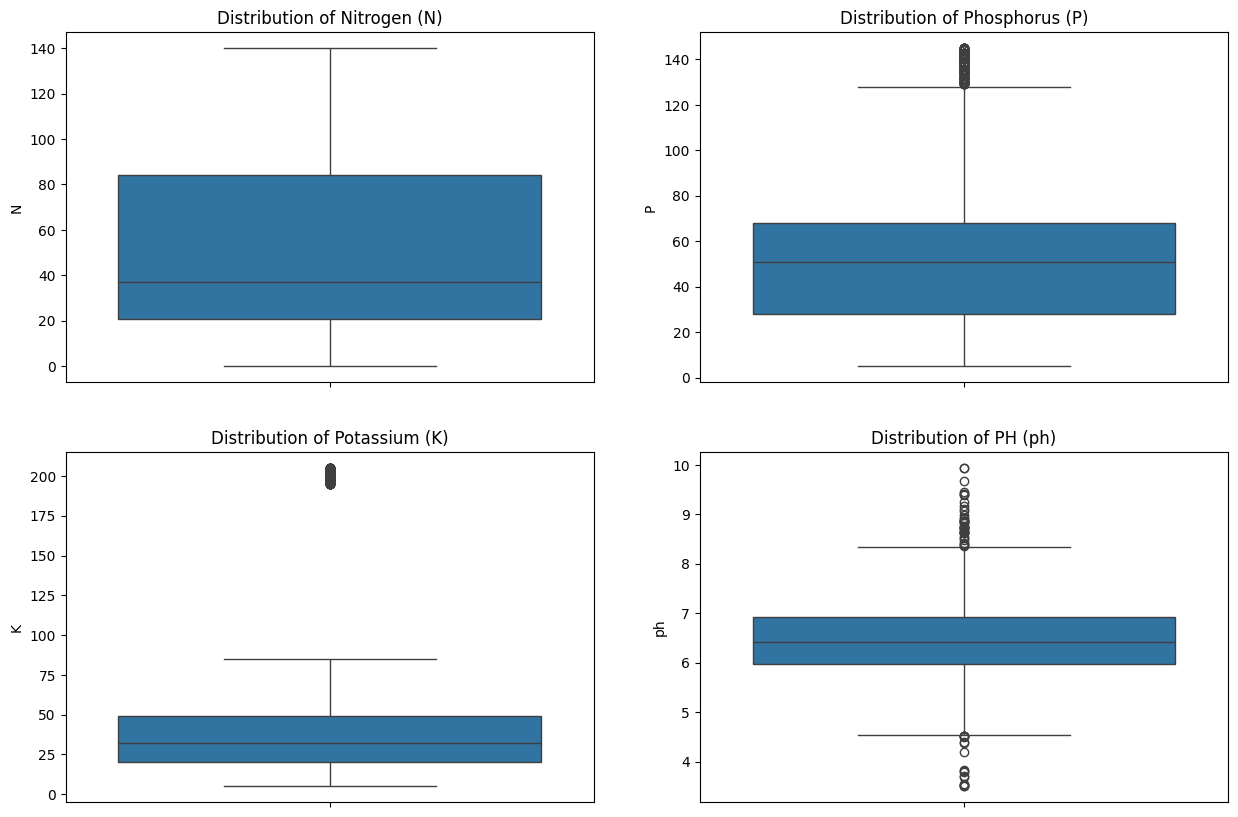

In [7]:
# Distribution of numerical features
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.boxplot(df['N'] , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Nitrogen (N)')

sns.boxplot(df['P'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Phosphorus (P)')

sns.boxplot(df['K'],ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Potassium (K)')

sns.boxplot(df['ph'],  ax=axes[1, 1])
axes[1, 1].set_title('Distribution of PH (ph)') 

plt.show() 


In [8]:
#printing shapes before outlier correction
print(df['K'].shape)
print(df['P'].shape)
print(df['N'].shape)
print(df['ph'].shape)

(2200,)
(2200,)
(2200,)
(2200,)


In [9]:
# outliers for K
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for column 'K'
Q1 = df['K'].quantile(0.25)
Q3 = df['K'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

# Filter out outliers
df = df[(df['K'] >= lower_bound) & (df['K'] <= upper_bound)]

# # Display the filtered DataFrame
# print(df_filtered)df_filtered
df['K'].shape 

(2000,)

In [10]:
# outliers for P
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for column 'p'
Q1 = df['P'].quantile(0.25)
Q3 = df['P'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

# Filter out outliers
df = df[(df['P'] >= lower_bound) & (df['P'] <= upper_bound)]

# # Display the filtered DataFrame
# print(df_filtered)df_filtered
df['P'].shape 

(2000,)

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for column 'ph'
Q1 = df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate median of column 'ph'
m_K = df['ph'].median()

# Replace outliers with the median value
df['ph'] = df['ph'].apply(lambda x: m_K if x < lower_bound or x > upper_bound else x) 


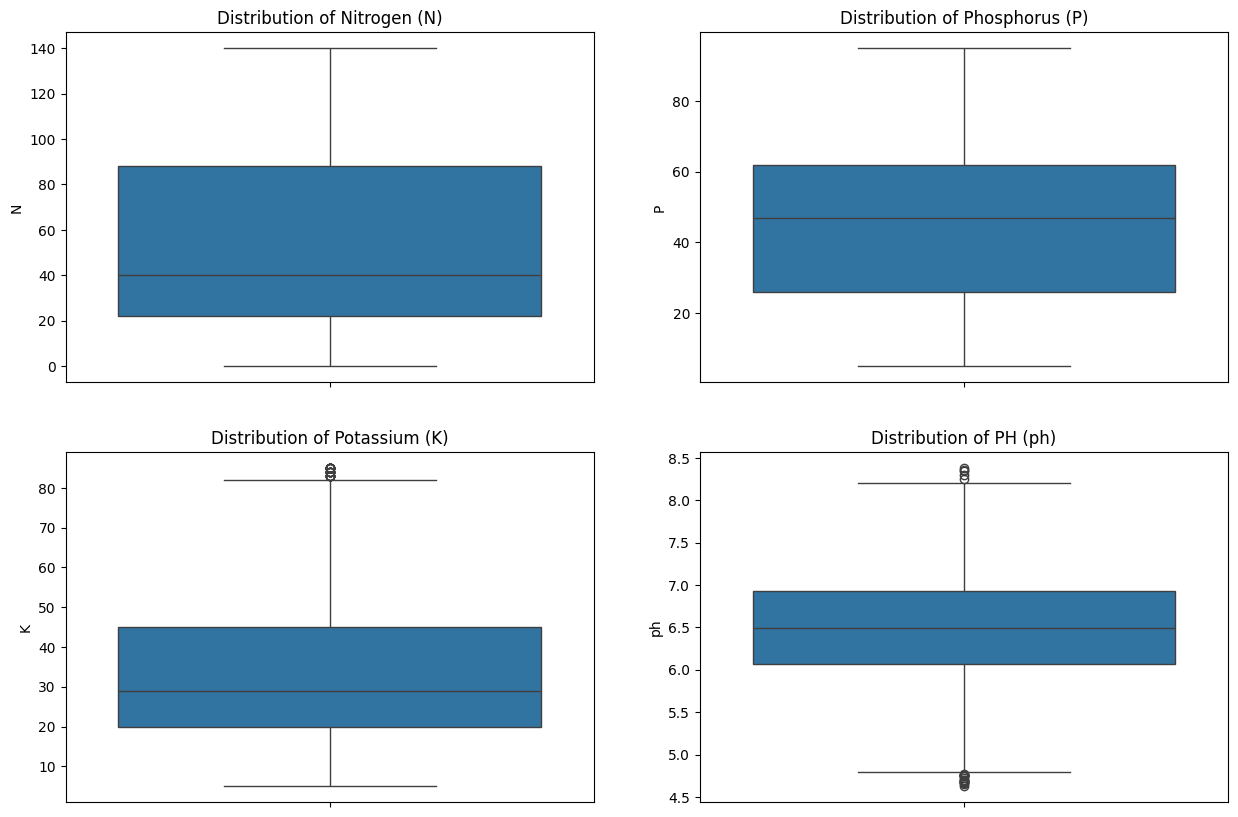

In [12]:
# Distribution of numerical features
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.boxplot(df['N'] , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Nitrogen (N)')

sns.boxplot(df['P'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Phosphorus (P)')

sns.boxplot(df['K'],ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Potassium (K)')

sns.boxplot(df['ph'],  ax=axes[1, 1])
axes[1, 1].set_title('Distribution of PH (ph)') 

plt.show() 


<Figure size 1200x1000 with 0 Axes>

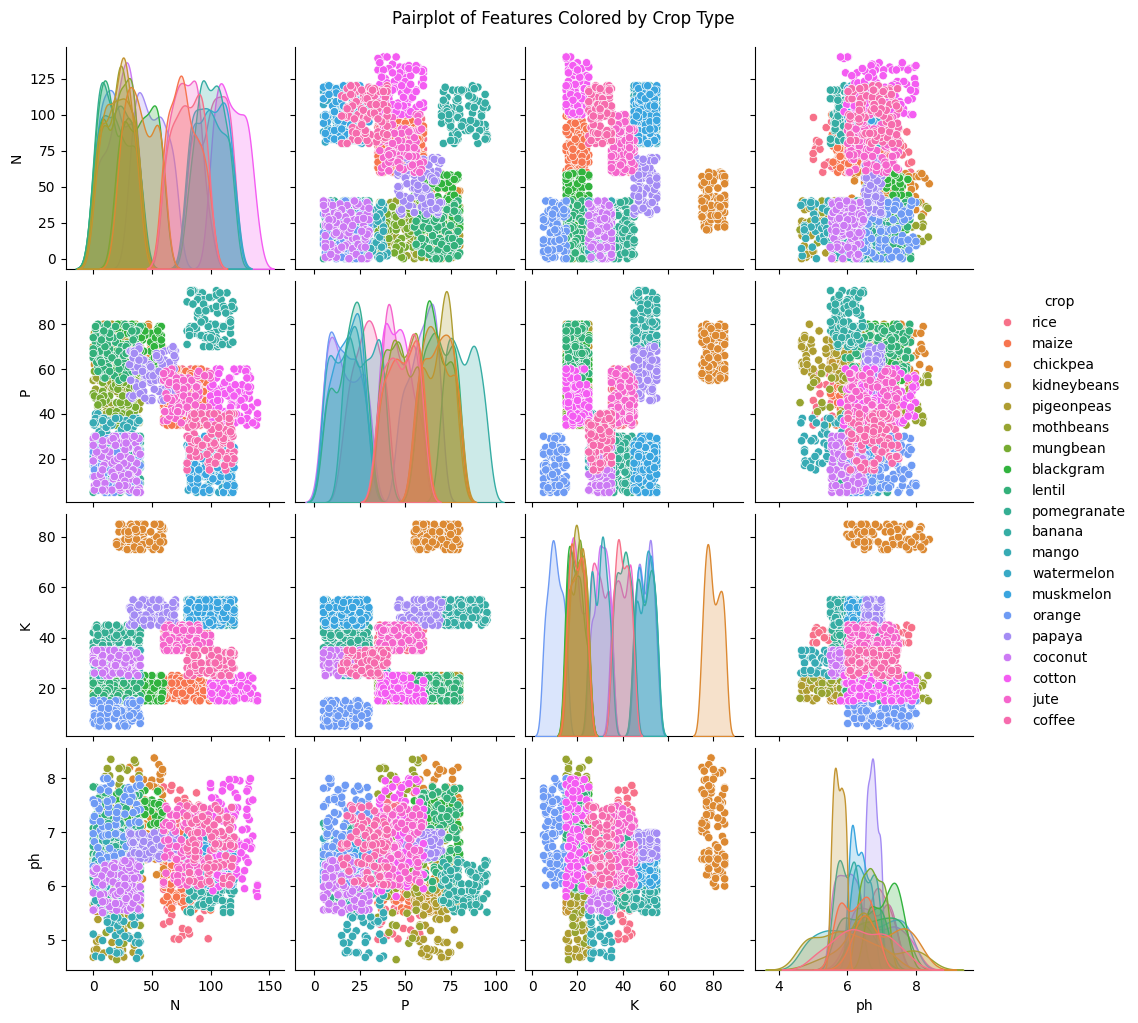

In [13]:
# corelation analysis
plt.figure(figsize=(12, 10))

# Pairplot to visualize feature relationships by crop
sns.pairplot(df, hue='crop')
plt.suptitle('Pairplot of Features Colored by Crop Type', y=1.02)
plt.show()  

In [14]:
# Define features (X) and target variable (y)
X = df[['N', 'P', 'K', 'ph']] 
y = df['crop']

In [15]:
# Scaling(Standadization) 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X) 

In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42) 


In [17]:
# Model Initialization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

model = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 120, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train) 
model = grid_search.best_estimator_ 

In [21]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

joblib.dump(model, "random_forest_model.pkl")

# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        15
   blackgram       0.65      0.72      0.68        18
    chickpea       1.00      1.00      1.00        22
     coconut       0.79      0.93      0.85        28
      coffee       1.00      1.00      1.00        24
      cotton       0.95      1.00      0.98        20
        jute       0.55      0.94      0.69        18
 kidneybeans       0.89      0.96      0.92        25
      lentil       0.43      0.56      0.49        16
       maize       1.00      0.94      0.97        18
       mango       0.85      0.58      0.69        19
   mothbeans       0.88      0.88      0.88        25
    mungbean       0.74      0.94      0.83        18
   muskmelon       0.56      0.59      0.57        17
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        23
  pigeonpeas       0.56      0.24  